In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("C:/Users/saiin/stroke prediction/data/Preprocessed_data.csv")

In [5]:
df.head()

,Unnamed: 0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,1,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,2,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,3,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,4,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [6]:
x=df.drop(columns="stroke")
y=df["stroke"]

In [7]:
y=pd.DataFrame(y)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)

# Hyper parameter tuning with Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [21]:
lgr_classifier=LogisticRegression()
grid={'C':10.0**np.arange(-2,2),'penalty':['l1','l2']}
cv=KFold(n_splits=5)

In [22]:
classifier=GridSearchCV(lgr_classifier,grid,cv=cv,scoring='f1_macro',n_jobs=-1)

In [23]:
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([ 0.01,  0.1 ,  1.  , 10.  ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [24]:
y_pred=classifier.predict(x_test)

In [25]:
confusion_matrix(y_test,y_pred)

array([[1205,    6],
       [   0,   67]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       0.92      1.00      0.96        67

    accuracy                           1.00      1278
   macro avg       0.96      1.00      0.98      1278
weighted avg       1.00      1.00      1.00      1278



In [27]:
accuracy_score(y_test,y_pred)

0.9953051643192489

# RandomForest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred=rfc.predict(x_test)

In [30]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1210    1]
 [   1   66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1211
           1       0.99      0.99      0.99        67

    accuracy                           1.00      1278
   macro avg       0.99      0.99      0.99      1278
weighted avg       1.00      1.00      1.00      1278



Saving the model

In [31]:
import pickle
filename='stroke_rfc.pkl'
pickle.dump(rfc,open(filename,'wb'))

# UnderSampling 

Logistic Regresssion

In [61]:
from sklearn.utils import resample
from sklearn import metrics
train=df.copy()
stroke=train[(train.stroke==1)]
not_stroke=train[(train.stroke==0)]
not_stroke_downsampled = resample(not_stroke, replace=False, n_samples=len(stroke)*3, random_state=0)
train_downsampled = pd.concat([not_stroke_downsampled, stroke]).sample(frac=1)
train_downsampled.stroke.value_counts()


0    747
1    249
Name: stroke, dtype: int64

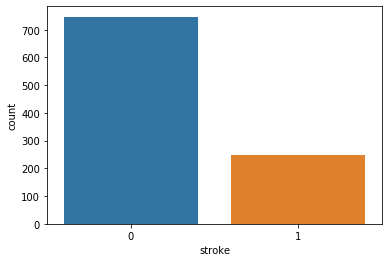

In [66]:
sns.countplot(x=train_downsampled.stroke)

In [67]:
downsampled_y = train_downsampled['stroke']
downsampled_X = train_downsampled.drop('stroke', axis=1)
lg = LogisticRegression()
lg.fit(downsampled_X, downsampled_y)
y_pred = lg.predict(x_test)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
confusion_matrix(y_pred,y_test)

array([[1216,    1],
       [   7,   54]], dtype=int64)

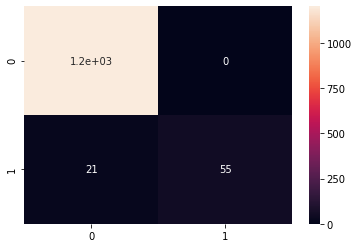

In [69]:
sns.heatmap(cm,annot=True)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1223
           1       0.89      0.98      0.93        55

    accuracy                           0.99      1278
   macro avg       0.94      0.99      0.96      1278
weighted avg       0.99      0.99      0.99      1278



In [71]:
auc=metrics.roc_auc_score(y_test,y_pred)
print(auc)

0.9880472757005873


In [72]:
print(accuracy_score(y_test,y_pred))

0.9937402190923318


# KNN classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(downsampled_X,downsampled_y)
knn_pred=knn.predict(x_test)
accuracy=knn.score(x_test,y_test)
cm=confusion_matrix(knn_pred,y_test)
print(cm)

[[1210    0]
 [  13   55]]


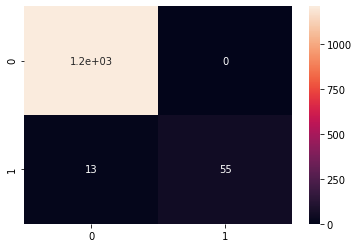

In [74]:
sns.heatmap(cm,annot=True)

In [75]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1223
           1       0.81      1.00      0.89        55

    accuracy                           0.99      1278
   macro avg       0.90      0.99      0.94      1278
weighted avg       0.99      0.99      0.99      1278



In [76]:
print(accuracy_score(y_test,knn_pred))

0.9898278560250391
